# ML Algorithm Insight Series
## Module: Clustering Algorithms (KMeans, Hierarchical, DBSCAN)

### 1. Introduction & Intuition

Clustering is an unsupervised learning technique used to group similar data points together. These algorithms uncover inherent structure in data without relying on labels.

Each method has a different philosophy:
- **KMeans**: partition into fixed clusters based on centroids.
- **Hierarchical**: build nested groupings using linkage criteria.
- **DBSCAN**: identify dense regions separated by sparse ones.


### 2. How the Algorithm Works

**KMeans**:
- Iteratively assign points to the nearest centroid
- Update centroids as the mean of their clusters
- Objective: Minimize intra-cluster variance (sum of squared distances)

**Hierarchical (Agglomerative)**:
- Start with individual points
- Merge closest pairs based on linkage distance
- Produces a dendrogram (tree structure)

**DBSCAN**:
- Groups points into dense regions using `eps` (neighborhood size) and `min_samples`
- Detects noise and clusters of arbitrary shape

KMeans objective function:
\[
J = \sum_{i=1}^k \sum_{x_j \in C_i} \|x_j - \mu_i\|^2
\]


### 3. Data and Preparation Insights

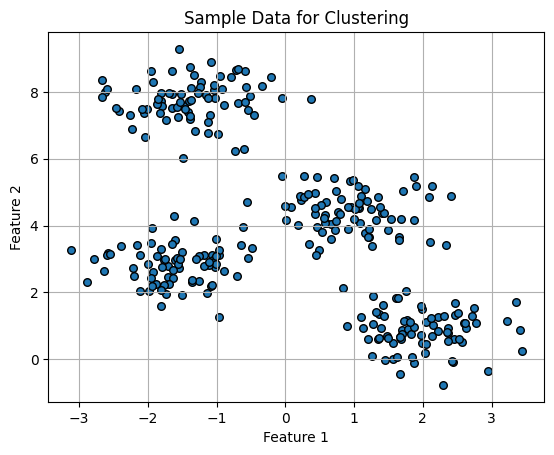

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=30, edgecolor='k')
plt.title("Sample Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Feature scaling improves performance. DBSCAN is sensitive to feature distribution; standardization is usually required.

### 4. Implementation Highlights

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=4)
dbscan = DBSCAN(eps=0.5, min_samples=5)

labels_kmeans = kmeans.fit_predict(X_scaled)
labels_hierarchical = hierarchical.fit_predict(X_scaled)
labels_dbscan = dbscan.fit_predict(X_scaled)

### 5. Insightful Visualization

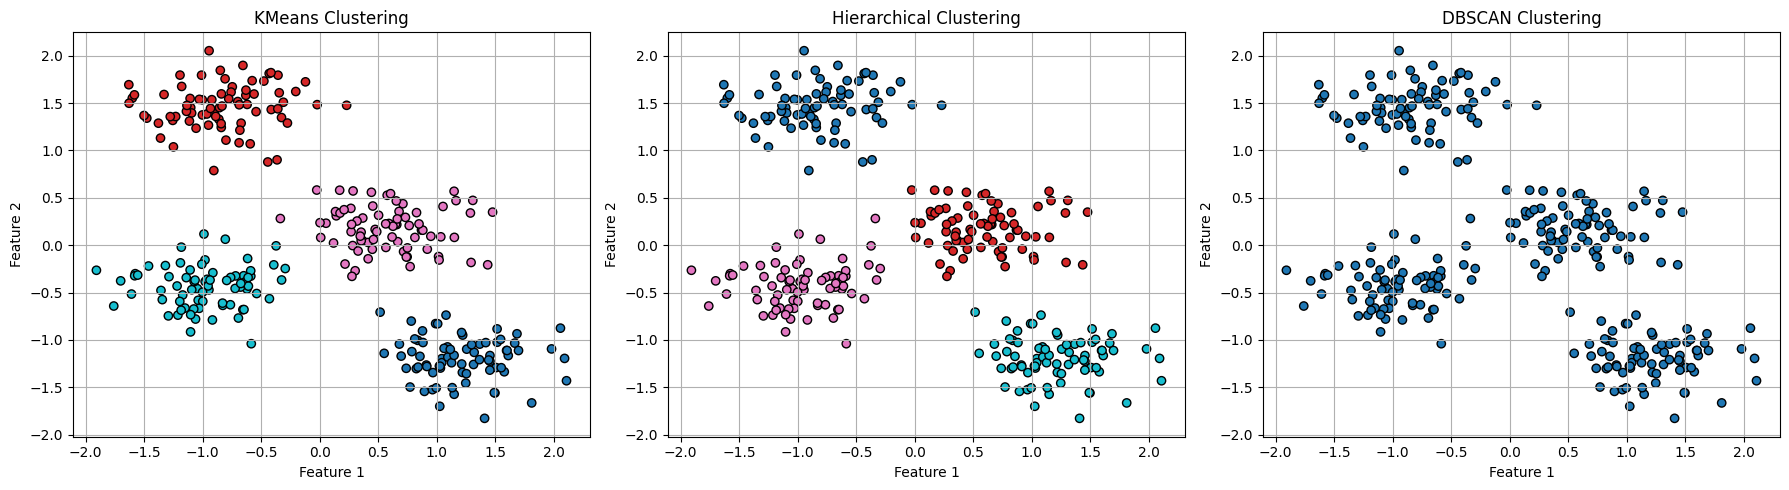

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='tab10', edgecolor='k')
axs[0].set_title("KMeans Clustering")

axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_hierarchical, cmap='tab10', edgecolor='k')
axs[1].set_title("Hierarchical Clustering")

axs[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='tab10', edgecolor='k')
axs[2].set_title("DBSCAN Clustering")

for ax in axs:
    ax.grid(True)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

Different algorithms capture different cluster shapes and structures. DBSCAN detects noise points.

### 6. Algorithm Evaluation

In [5]:
from sklearn.metrics import silhouette_score

# Filter out noise points labeled as -1
valid_dbscan = labels_dbscan != -1
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

if n_clusters_dbscan >= 2 and valid_dbscan.any():
    score = silhouette_score(X_scaled[valid_dbscan], labels_dbscan[valid_dbscan])
    print(f"DBSCAN Silhouette Score: {score:.2f}")
else:
    print("DBSCAN did not find enough clusters to compute silhouette score.")


DBSCAN did not find enough clusters to compute silhouette score.


### 7. Pros, Cons, and Techniques

**KMeans**
- Pros: Fast, simple, scalable
- Cons: Requires `k`, assumes spherical clusters

**Hierarchical**
- Pros: No need for `k`, interpretable dendrograms
- Cons: Computationally expensive, less scalable

**DBSCAN**
- Pros: Finds arbitrary shapes, handles noise
- Cons: Sensitive to `eps`, struggles with varying density

**Techniques**:
- Use elbow method for KMeans
- Standardize inputs for DBSCAN
- Visualize dendrograms in hierarchical clustering


### 8. Further Explorations

- TODO: Try varying DBSCAN `eps` and `min_samples`
- TODO: Compare KMeans with Gaussian Mixture Models
- TODO: Use dendrograms for threshold tuning in hierarchical clustering


### 9. Summary & Resources

**Key Insights:**
- Clustering uncovers hidden structure without labels.
- Each method has trade-offs between speed, shape sensitivity, and interpretability.
- Visualization is essential for understanding results.

**Further Reading:**
- Scikit-learn Clustering Documentation
- Jain (1999) – Data Clustering: A Review
- Bishop – Pattern Recognition and Machine Learning

**Notebook Repo**: (add your GitHub link)  
**Companion Article**: (add Medium/Substack link)
